<a href="https://www.lnls.cnpem.br/"><img src="https://www.lnls.cnpem.br/wp-content/uploads/2019/01/LNLS-Assinatura.svg" style="width:200px; text-align:left;"></a>

## Magnet Inductance Step Test Fast Corrector - FC-001 - QS Coil

>  - Magnet under test: Fast Corrector - FC-001 - QS Coil;

> - Power Supply: CAENels FAST-PS 1020;


> - Goal: Test performed to measure the possible inductance variation as a function of the applied current.

> Procedure: The input current in the coils is varied in continuous steps from 1 A amplitude to a maximum of 6 A (maximum PID adjustment).
With the oscilloscope, we measure the variation of current and voltage in the coils, calculate the resistance and through the relationship between voltage and current over time, it is possible to determine the time constant of the RL loop and thus calculate the inductance of the coil.

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from sympy import *
import scipy
init_printing(True)
%matplotlib inline

In [2]:
#Modifying the plot style
style.use('seaborn')

In [3]:
# Defining Variables
E, DeltaI, DeltaT, DeltaV, L = symbols('epsilon Delta_I Delta_t Delta_V L')
Lt, V_t, R_0, I_t, t, V, tau = symbols('L(t) V(t) R_0 I(t) t V tau')
I, Ee, R, e, I_tau = symbols('I E R e I_tau')

### Definitions

In [4]:
_induct = Eq(L,-E*(DeltaT/DeltaI))
_induct_time = Eq(Lt,-1*(V_t - R_0*I_t)*(DeltaT/DeltaI))
_R0 = Eq(R_0, DeltaV/DeltaI)

#Deduction
_circuit_RL = Eq(I,(Ee/R_0)-(Ee/R_0)*e**((-R_0/L)*t))

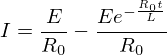

In [5]:
_circuit_RL

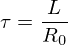

In [6]:
_time_const = Eq(tau, L/R_0)
_time_const

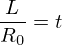

In [7]:
_time_tau = Eq(_time_const.rhs,t)
_time_tau

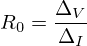

In [8]:
_R0

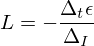

In [9]:
_induct

### Using Time Constants for RL Circuits

In [10]:
_I_tau = Eq(I_tau, (Ee/R_0)-(Ee/R_0)*e**((-R_0/L)*_time_tau.lhs))#.simplify()

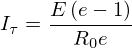

In [11]:
_I_tau_sim = simplify(_I_tau)
_I_tau_sim

In [12]:
neper = Eq(e,np.exp(1))
neper

In [13]:
_I_tau =  Eq(I_tau, (_circuit_RL.lhs)-(_circuit_RL.lhs)*neper.rhs**((-R_0/L)*_time_tau.lhs)).simplify()
_I_tau

In [14]:
# from IPython.display import Image
# Image(filename='Magnet_Inductance_Test_image.png')

## Step test 0 to 2.1A - QS Coil

In [15]:
#Import current steps data files
_step_01 = pd.read_csv('fc_01_02.csv', sep=',', header=1)
_step_02 = pd.read_csv('fc_01_05.csv', sep=',', header=1)
_step_03 = pd.read_csv('fc_01_08.csv', sep=',', header=1)
_step_04 = pd.read_csv('fc_01_10.csv', sep=',', header=1)
_step_05 = pd.read_csv('fc_01_12.csv', sep=',', header=1)
_step_06 = pd.read_csv('fc_01_15.csv', sep=',', header=1)
_step_07 = pd.read_csv('fc_01_18.csv', sep=',', header=1)
_step_08 = pd.read_csv('fc_01_21.csv', sep=',', header=1)
# _step_09 = pd.read_csv('fc_01_009.csv', sep=',', header=1)
# _step_10 = pd.read_csv('fc_01_010.csv', sep=',', header=1)

In [16]:
#Creating dictionary with steps
_dict = {'step01': _step_01,
         'step02': _step_02,
         'step03': _step_03,
         'step04': _step_04,
         'step05': _step_05,
         'step06': _step_06,
         'step07': _step_07,
         'step08': _step_08
#          'step09': _step_09,
#          'step10': _step_10
        }

In [17]:
#Manipulating data for build list of arrays
_volts_array = []
_current_array = []
_resistance_array = []
for item in _dict:
    _volts_array.append(_dict[str(item)].Volt)
    _current_array.append(_dict[str(item)].Ampere)
    _resistance_array.append(_dict[str(item)].Volt/_dict[str(item)].Ampere)

#Convert list to numpy array
_volts_array = np.asarray(_volts_array)
_current_array = np.asarray(_current_array)
_resistance_array = np.asarray(_resistance_array)

#Transposed arrays
_volts_array = _volts_array.T
_current_array = _current_array.T
_resistance_array = _resistance_array.T

In [18]:
#Creating DF for volts
_DF_for_volts = pd.DataFrame(_volts_array,
                             index=_step_01.second,
                             columns=['Step01_volts(v)', 'Step02_volts(v)', 'Step03_volts(v)',
                                      'Step04_volts(v)', 'Step05_volts(v)', 'Step06_volts(v)',
                                      'Step07_volts(v)', 'Step08_volts(v)'])#, 'Step09_volts(v)',
#                                       'Step10_volts(v)'])
#Creating DF for ampere
_DF_for_amp = pd.DataFrame(_current_array,
                           index=_step_01.second,
                           columns=['Step01_amp(A)', 'Step02_amp(A)', 'Step03_amp(A)',
                                    'Step04_amp(A)', 'Step05_amp(A)', 'Step06_amp(A)',
                                    'Step07_amp(A)', 'Step08_amp(A)'])#, 'Step09_amp(A)',
#                                     'Step10_amp(A)'])
#Creating DF for resistance
_DF_for_resis = pd.DataFrame(_resistance_array,
                             index=_step_01.second,
                             columns=['Step01_R(ohm)', 'Step02_R(ohm)', 'Step03_R(ohm)',
                                      'Step04_R(ohm)', 'Step05_R(ohm)', 'Step06_R(ohm)',
                                      'Step07_R(ohm)', 'Step08_R(ohm)'])#, 'Step09_R(ohm)',
#                                       'Step10_R(ohm)'])

### Summarizing  Input Data Frames

In [19]:
_DF_for_volts.head()

,Step01_volts(v),Step02_volts(v),Step03_volts(v),Step04_volts(v),Step05_volts(v),Step06_volts(v),Step07_volts(v),Step08_volts(v)
second,,,,,,,,
-0.002500,-0.324513,-0.179742,-0.230308,-0.286825,-0.336291,-0.337076,-0.235788,-0.362202
-0.002498,-0.348854,-0.260144,-0.224968,-0.361417,-0.274262,-0.323728,-0.311950,-0.361417
-0.002495,-0.337076,-0.235019,-0.230308,-0.373979,-0.298603,-0.298603,-0.298603,-0.336291
-0.002492,-0.537296,-0.219943,-0.310395,-0.224011,-0.311950,-0.311165,-0.323728,-0.311165
-0.002490,-0.373979,-0.099654,-0.205182,-0.499608,-0.336291,-0.298603,-0.198885,-0.224011


In [20]:
_DF_for_amp.head()

,Step01_amp(A),Step02_amp(A),Step03_amp(A),Step04_amp(A),Step05_amp(A),Step06_amp(A),Step07_amp(A),Step08_amp(A)
second,,,,,,,,
-0.002500,0.021633,0.028420,0.021664,-0.004885,-0.004885,-0.003629,-0.006220,-0.003629
-0.002498,0.021664,0.027666,0.022166,-0.004885,-0.003629,-0.003629,-0.003708,-0.007398
-0.002495,0.023140,0.028153,0.022166,-0.003708,-0.004885,-0.002451,-0.003629,-0.004964
-0.002492,0.021664,0.028655,0.022669,-0.004885,-0.004964,-0.004885,-0.003708,-0.006142
-0.002490,0.022135,0.028671,0.022166,-0.004885,-0.003708,-0.004964,-0.004885,-0.002373


In [21]:
_DF_for_resis.head()

,Step01_R(ohm),Step02_R(ohm),Step03_R(ohm),Step04_R(ohm),Step05_R(ohm),Step06_R(ohm),Step07_R(ohm),Step08_R(ohm)
second,,,,,,,,
-0.002500,-15.001158,-6.324515,-10.630908,58.711473,68.836908,92.882795,37.907328,99.806271
-0.002498,-16.102956,-9.402979,-10.149037,73.979987,75.574104,89.204698,84.138891,48.853994
-0.002495,-14.566760,-8.347918,-10.389905,100.869246,61.122291,121.814732,82.281222,67.748048
-0.002492,-24.801376,-7.675435,-13.692518,45.853779,62.844502,63.693830,87.315541,50.665097
-0.002490,-16.895338,-3.475765,-9.256408,102.266916,90.703967,60.155461,40.710700,94.409099


### Plotting all Data Frames

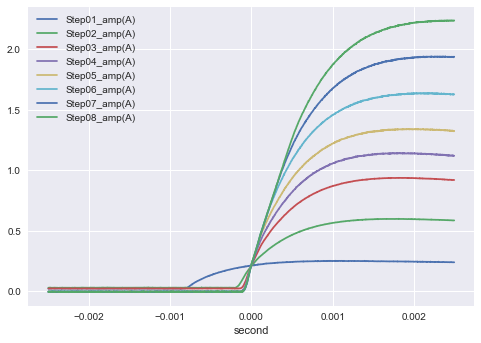

In [22]:
_DF_for_amp.plot()

In [23]:
#Slice DF to search rise time range
#a = _DF_for_amp[-0.08:0.4175]
a = _DF_for_amp[-0.001:0.001]
v = _DF_for_volts[-0.001:0.001]
r = _DF_for_resis[-0.001:0.001]
#Plotting
# cx = a.plot(y='Step01_amp(A)')
# v.plot(ax=cx, y='Step01_volts(v)')
# r.plot(ax=cx, y='Step01_R(ohm)')

In [24]:
#Fitting curve for Current
_x_axis = a.index
poly = np.polyfit(_x_axis,a['Step01_amp(A)'],10)
ploy1d = np.poly1d(poly)
#print(ploy1d)

In [25]:
#Poly fit vector
poly_fit_graph = []
for i in a.index:
    num = ploy1d(i)
    poly_fit_graph.append(float(num))

### Viewing the first step 

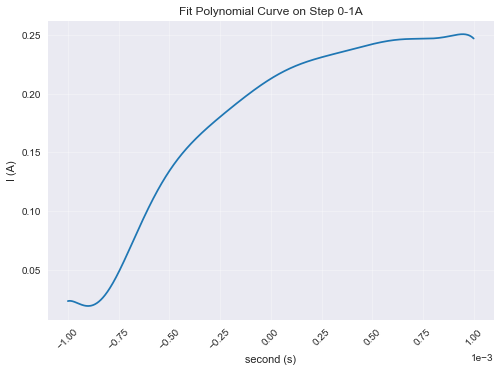

In [26]:
#Plotting polynimial curve on step 0-1A

color = 'tab:blue'
plt.plot(_x_axis,poly_fit_graph, color=color)
plt.xlabel('second (s)')
plt.ylabel('I (A)')
plt.title('Fit Polynomial Curve on Step 0-1A')
plt.xticks(rotation='45')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-1e-3,1e-3))
plt.grid('on', alpha=0.3)

In [27]:
#Derivative curve
_deriv = ploy1d.deriv()  #dI/dt

In [28]:
#Derived curve points vector
calc = np.array([])
for i in a.index:
    calc = np.append(calc, _deriv(i))

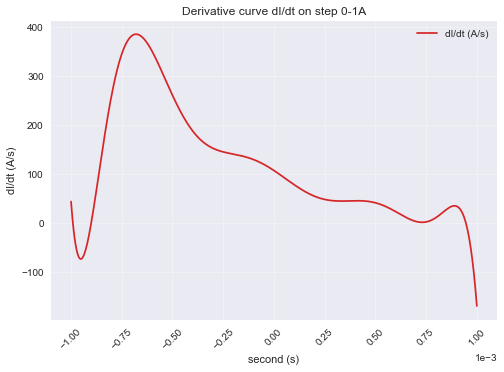

In [29]:
#Plotting dI/dt curve on step 0-1A

color = 'tab:red'
plt.plot(_x_axis, calc, color=color, label='dI/dt (A/s)')
plt.xlabel('second (s)')
plt.ylabel('dI/dt (A/s)')
plt.title('Derivative curve dI/dt on step 0-1A')
plt.legend(loc='best')
plt.xticks(rotation='45')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-1e-3,1e-3))
plt.grid('on', alpha=0.3)

In [30]:
# #plt.plot(_x_axis, a['Step01_amp(A)'].values, 'b-', label='I(A)')
# plt.plot(_x_axis, poly_fit_graph, 'b-', label='I (A)')
# plt.plot(_x_axis, calc, 'r--', label='dI/dt (A/s)')
# plt.xlabel('second (s)')
# plt.ylabel('I (A)')
# plt.title('dI/dt(A/s) versus I(A) at Step 0-1A')
# plt.legend(loc='best')

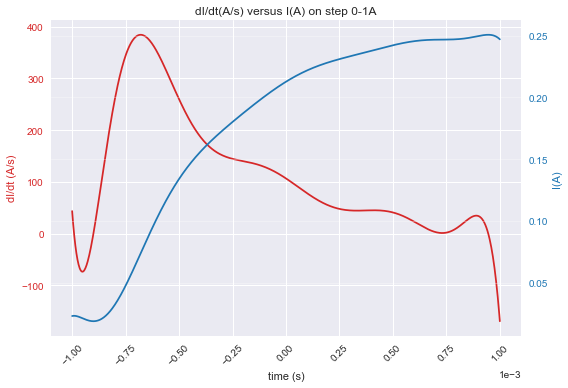

In [31]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('dI/dt (A/s)', color=color)
ax1.plot(_x_axis, calc, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(-1e-3,1e-3))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('I(A)', color=color)  # we already handled the x-label with ax1
ax2.plot(_x_axis, poly_fit_graph, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid('on', alpha=0.3)

plt.title('dI/dt(A/s) versus I(A) on step 0-1A')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

-------------------------------------------

## Calculating inductance versus current for all steps

In [32]:
def poly_fit_func(df, n): #_DF_for_amp ou a
    '''Find the polynomial fit for each current step'''
    _poly_array = []
    _deriv_array = []
    _x_axis = df.index
    for item in df.columns:
        #Fitting polynomial
        poly = np.polyfit(_x_axis,df[item],n)
        ploy1d = np.poly1d(poly)
        _poly_array.append(ploy1d)
        
        #Derivative curve
        _deriv = ploy1d.deriv()  #dI/dt
        _deriv_array.append(_deriv)
    return _deriv_array
    
def final_devs(df, der_arr):
    '''List with the derivatives of the polynomial fit curves'''
    _x_axis = df.index
    f = []
    for i in der_arr:
        final = np.array([])
        for j in _x_axis:
            final = np.append(final, i(j))
        f.append(final)
    return f

In [33]:
d_arrays = poly_fit_func(a,25)

In [34]:
_derive_datas = final_devs(a,d_arrays)

In [35]:
'''Another method more simple to get derivative data'''
def derivative_form(df):
    '''Numerical method for obtaining the derivative from raw data'''
    _x_axis = df.index
    _f_array = []
    _derivative_final_list = []
    for item in df.columns:
        _f_ = np.diff(df[item])/np.diff(_x_axis)
        _f_array.append(_f_)
    
    #Replace n-1 term with zero    
    for item in _f_array:
        item = np.append(item, 0)
        _derivative_final_list.append(item)
    return _derivative_final_list

In [36]:
def df_creator(df,df_r): #(_DF_for_amp, _DF_for_resis) ou (a, r)
    _list_dfs = []
    #_deriv_list = derivative_form(df)
    for i in range(len(df.columns)):
        _dicionario = {'time(s)':df.index,
                       'I(A)':df[df.columns[i]].values,
                       #'dI/dt': _deriv_list[i],
                       'dI/dt': _derive_datas[i],
                       'R(ohm)':df_r[df_r.columns[i]].values}
        _list_dfs.append(pd.DataFrame.from_dict(_dicionario))
    return _list_dfs

In [37]:
lista_de_dfs = df_creator(a, r)

In [38]:
lista_de_dfs[0].head()

,I(A),R(ohm),dI/dt,time(s)
0,0.021664,-15.523061,-178.858996,-0.001000
1,0.021664,-13.239726,-90.123291,-0.000997
2,0.022135,-15.192680,-30.008798,-0.000995
3,0.021664,-11.500042,8.105328,-0.000992
4,0.022166,-12.904160,29.677994,-0.000990


In [39]:
_rd = []
_raw_deriv = []
for i in range(len(lista_de_dfs)):
    _rd.append(np.diff(lista_de_dfs[i]['I(A)']) / np.diff(_x_axis))
for item in _rd:
    item = np.append(item, 0)
    _raw_deriv.append(item)

### Subplotting of the derivative curves and fit adjust for each step

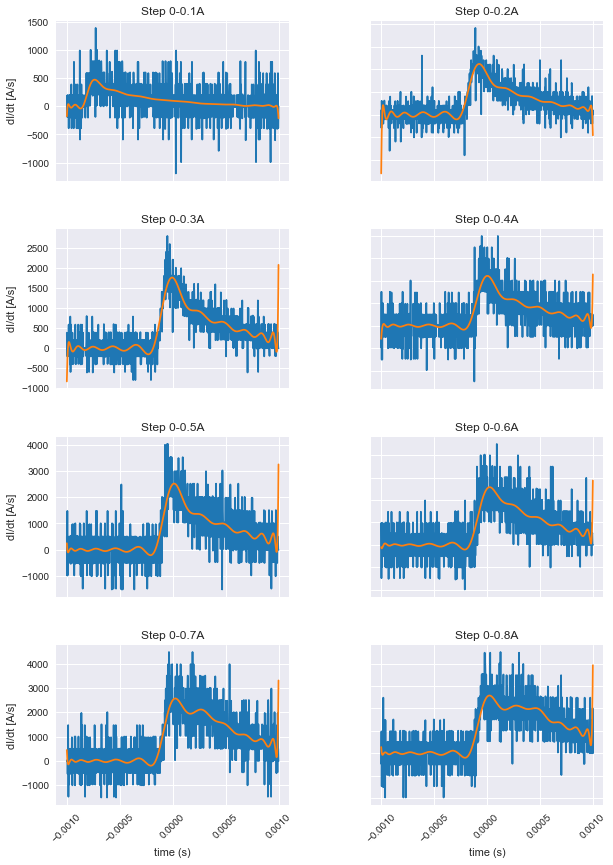

In [40]:
#Plotting raw derivative and poly fitting derivative together
fig, axs = plt.subplots(4, 2, sharex=True)
axs[0, 0].plot(_x_axis, _raw_deriv[0],'tab:blue')
axs[0, 0].plot(_x_axis, lista_de_dfs[0]['dI/dt'], 'tab:orange')
axs[0, 0].set_title('Step 0-0.1A')

axs[0, 1].plot(_x_axis, _raw_deriv[1],'tab:blue')
axs[0, 1].plot(_x_axis, lista_de_dfs[1]['dI/dt'], 'tab:orange')
axs[0, 1].set_title('Step 0-0.2A')

axs[1, 0].plot(_x_axis, _raw_deriv[2],'tab:blue')
axs[1, 0].plot(_x_axis, lista_de_dfs[2]['dI/dt'], 'tab:orange')
axs[1, 0].set_title('Step 0-0.3A')

axs[1, 1].plot(_x_axis, _raw_deriv[3],'tab:blue')
axs[1, 1].plot(_x_axis, lista_de_dfs[3]['dI/dt'], 'tab:orange')
axs[1, 1].set_title('Step 0-0.4A')

axs[2, 0].plot(_x_axis, _raw_deriv[4],'tab:blue')
axs[2, 0].plot(_x_axis, lista_de_dfs[4]['dI/dt'], 'tab:orange')
axs[2, 0].set_title('Step 0-0.5A')

axs[2, 1].plot(_x_axis, _raw_deriv[5],'tab:blue')
axs[2, 1].plot(_x_axis, lista_de_dfs[5]['dI/dt'], 'tab:orange')
axs[2, 1].set_title('Step 0-0.6A')

axs[3, 0].plot(_x_axis, _raw_deriv[6],'tab:blue')
axs[3, 0].plot(_x_axis, lista_de_dfs[6]['dI/dt'], 'tab:orange')
axs[3, 0].set_title('Step 0-0.7A')

axs[3, 1].plot(_x_axis, _raw_deriv[7],'tab:blue')
axs[3, 1].plot(_x_axis, lista_de_dfs[7]['dI/dt'], 'tab:orange')
axs[3, 1].set_title('Step 0-0.8A')

# axs[4, 0].plot(_x_axis, _raw_deriv[8],'tab:blue')
# axs[4, 0].plot(_x_axis, lista_de_dfs[8]['dI/dt'], 'tab:orange')
# axs[4, 0].set_title('Step 0-0.9A')

# axs[4, 1].plot(_x_axis, _raw_deriv[9],'tab:blue')
# axs[4, 1].plot(_x_axis, lista_de_dfs[9]['dI/dt'], 'tab:orange')
# axs[4, 1].set_title('Step 0-1A')

for ax in axs.flat:
    ax.set(xlabel='time (s)', ylabel='dI/dt [A/s]')
    ax.tick_params(axis='x', labelrotation=45)
    #ax.ticklabel_format(axis='x', style='sci', scilimits=(-1e-3,1e-3))
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(top=2.0, bottom=0.02, left=0.05, right=1.00, hspace=0.3,
                    wspace=0.35)

In [41]:
#Finding inflection point and first positives derivatives values
#Arrays used
_inflex_pts = []
_first_positives = []
_val_max = np.array([])

for i in lista_de_dfs:
    _inflex_pts.append(i.loc[i['dI/dt'].idxmax()][3])
    _box, j = 0, 0
    while i['dI/dt'][j] > _box:
        j+=1
    _box = i['dI/dt'][j]
    _first_positives.append(list(i.loc[i['dI/dt'] == _box].values)[0][3])
    
    #Fiding the maximum current for each step, and then calculating 63%:
    _val_max = np.append(_val_max,i.loc[i['I(A)'].idxmax()][0])
_I_tau_arr = _val_max*0.63    

In [42]:
#Finding initial time t0 by mean difference between end and start points on current curve:
_diff_arr = []
for j in range(len(lista_de_dfs)):
    _result = np.array([])
    for i in range(len(lista_de_dfs[0]['I(A)'])):
        _result = np.append(_result, lista_de_dfs[j]['I(A)'].iloc[-i] - lista_de_dfs[j]['I(A)'].iloc[i])
    _diff_arr.append(_result)

_more_than = np.array([])
for k in range(len(_diff_arr)):
    l = 1
    while _diff_arr[k][l] > 0:
        l += 1
    _more_than = np.append(_more_than, l)

In [55]:
_didt_pos = np.array([])
_t_arr = np.array([])
_t0_arr = np.array([])
_R_arr = np.array([])

for i in range(len(lista_de_dfs)):

#     Fiding initial time t0 where dI/Dt are positve:
#     _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['dI/dt'] == _didt_pos[i]].iloc[:1].values)[0][3])

#    Finding initial time t0 where time > -60 us:
#     _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['time(s)'] > -0.00006].iloc[:1].values)[0][3])

#   Finding intial time t0 where I > 0.024A:
    if i == 1:
        t = 0.031
    elif i == 2:
        t = 0.028
    else:
        t = 0.0225
    _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] > t].iloc[:1].values)[0][3])

#   Finding initial time t0 by mean difference between end and start points on current curve:
#     _t0_arr = np.append(_t0_arr, list(lista_de_dfs[i].iloc[int(_more_than[i])])[3]
    
    #Fiding final time t of the 63% of current:
    _t_arr = np.append(_t_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] >= _I_tau_arr[i]].iloc[:1].values)[0][3])
    
    #Collect R values in the 63% of the current:
    _R_arr = np.append(_R_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] >= _I_tau_arr[i]].iloc[:1].values)[0][1])

In [56]:
print(_val_max)
print(_I_tau_arr)
print(_t_arr)
print(_t0_arr)
print(_R_arr)

[0.25128079 0.56384705 0.86890013 1.05541617 1.21998903 1.45491365
 1.67476289 1.87317684]
[0.1583069  0.35522364 0.54740708 0.66491219 0.76859309 0.9165956
 1.05510062 1.18010141]
[-0.0003825  0.00023    0.0003     0.000325   0.00034    0.00037
  0.00041    0.0004625]
[-9.55e-04 -1.85e-04 -1.20e-04 -9.00e-05 -8.00e-05 -7.75e-05 -7.50e-05
 -7.75e-05]
[10.32720443 13.85783903 14.16815194 14.1445171  14.31055208 14.71529348
 15.81442077 16.12343062]


In [57]:
#Average resistance for comparison
_R_avg = np.array([])
for i in range(len(lista_de_dfs)):
    _R_avg = np.append(_R_avg,lista_de_dfs[i]['R(ohm)'].iloc[500:])
# print(_R_avg.mean())
# print(_R_avg.std())

In [58]:
# Calculating Delta time (dt) for all steps
_dt = _t_arr - _t0_arr

#Finally, the Inductance for each step in Time Constant (1τ)
_L_arr = np.array([])
for i in range(len(lista_de_dfs)):
    _L_arr = np.append(_L_arr, _dt[i]*_R_arr[i])
    #_L_arr = np.append(_L_arr, _dt[i]*_R_avg.mean())  #don't use
_L_arr

array([0.00591232, 0.005751  , 0.00595062, 0.00586997, 0.00601043,
       0.00658509, 0.00766999, 0.00870665])

### Plotting Inductance [L] versus Current [A]

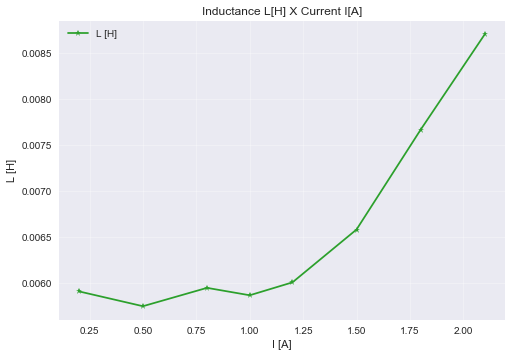

In [59]:
color = 'tab:green'
#plt.plot(np.arange(0.1,1.1,0.1),_L_arr, '*-', color=color, label='L [H]')
plt.plot([0.2, 0.5, 0.8, 1.0, 1.2, 1.5, 1.8, 2.1],_L_arr, '*-', color=color, label='L [H]')
plt.xlabel('I [A]')
plt.ylabel('L [H]')
plt.title('Inductance L[H] X Current I[A]')
plt.legend(loc='best')
plt.grid('on', alpha=0.3)

#### Average value for inductance L [H]:

In [60]:
#Avearage Inductance
_L_mean = _L_arr.mean()
_L_mean

## Visualization data with Plotly

In [61]:
import plotly.express as px
import plotly.graph_objects as go

In [62]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['I(A)'], name="I [A]"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['dI/dt'], name="dI/dt [A/s]"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>dI/dt(A/s) versus I(A) on Step 0-1A</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="time (s)")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> I[A]", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> dI/dt [A/s]", secondary_y=True, showgrid=False)

fig.show()



In [63]:

#Muliple Y-Axes Subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=2,subplot_titles=("Step 0-0.2A", "Step 0-0.5A", "Step 0-0.8A", "Step 0-1.0A", "Step 0-1.2A",
                                                   "Step 0-0.1.5A", "Step 0-0.1.8A", "Step 0-2.1A"),#, "Step 0-0.9A", "Step 0-1A"),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]
#                            [{"secondary_y": True}, {"secondary_y": True}]
                          ])
# for k in range(len(lista_de_dfs)):
#     for i in range(1,6):
#         for j in range(1,3):
#             fig.add_trace(
#                 go.Scatter(x=lista_de_dfs[k]['time(s)'], y=lista_de_dfs[k]['I(A)'], name="0-"+str((k+1)/10)+"A I[A]"),
#                 row=i, col=j, secondary_y=False)

#             fig.add_trace(
#                 go.Scatter(x=lista_de_dfs[k]['time(s)'], y=lista_de_dfs[k]['dI/dt'], name="0-"+str((k+1)/10)+"[A/s]"),
#                 row=i, col=j, secondary_y=True,
#             )

# Top left (1x1)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['I(A)'], name="0-0.1A I[A]"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['dI/dt'], name="0-0.1A dI/dt[A/s]"),
    row=1, col=1, secondary_y=True,
)

# Top right (1x2)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[1]['time(s)'], y=lista_de_dfs[1]['I(A)'], name="0-0.2A I[A]"),
    row=1, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[1]['time(s)'], y=lista_de_dfs[1]['dI/dt'], name="0-0.2A dI/dt[A/s]"),
    row=1, col=2, secondary_y=True,
)

# Middle left(2x1)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[2]['time(s)'], y=lista_de_dfs[2]['I(A)'], name="0-0.3A I[A]"),
    row=2, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[2]['time(s)'], y=lista_de_dfs[2]['dI/dt'], name="0-0.3A dI/dt[A/s]"),
    row=2, col=1, secondary_y=True,
)


# Middle right (2x2)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[3]['time(s)'], y=lista_de_dfs[3]['I(A)'], name="0-0.4A I[A]"),
    row=2, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[3]['time(s)'], y=lista_de_dfs[3]['dI/dt'], name="0-0.4A dI/dt[A/s]"),
    row=2, col=2, secondary_y=True,
)

# Bottom left (3x1)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[4]['time(s)'], y=lista_de_dfs[4]['I(A)'], name="0-0.5A I[A]"),
    row=3, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[4]['time(s)'], y=lista_de_dfs[4]['dI/dt'], name="0-0.5A dI/dt[A/s]"),
    row=3, col=1, secondary_y=True,
)

# Bottom right (3x2)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[5]['time(s)'], y=lista_de_dfs[5]['I(A)'], name="0-0.6A I[A]"),
    row=3, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[5]['time(s)'], y=lista_de_dfs[5]['dI/dt'], name="0-0.6A dI/dt[A/s]"),
    row=3, col=2, secondary_y=True,
)

# Bottom left (4x1)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[6]['time(s)'], y=lista_de_dfs[6]['I(A)'], name="0-0.7A I[A]"),
    row=4, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[6]['time(s)'], y=lista_de_dfs[6]['dI/dt'], name="0-0.7A dI/dt[A/s]"),
    row=4, col=1, secondary_y=True,
)

# Bottom right (4x2)
fig.add_trace(
    go.Scatter(x=lista_de_dfs[7]['time(s)'], y=lista_de_dfs[7]['I(A)'], name="0-0.8A I[A]"),
    row=4, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[7]['time(s)'], y=lista_de_dfs[7]['dI/dt'], name="0-0.8A dI/dt[A/s]"),
    row=4, col=2, secondary_y=True,
)

# # Bottom left (5x1)
# fig.add_trace(
#     go.Scatter(x=lista_de_dfs[8]['time(s)'], y=lista_de_dfs[8]['I(A)'], name="0-0.9A I[A]"),
#     row=5, col=1, secondary_y=False,
# )

# fig.add_trace(
#     go.Scatter(x=lista_de_dfs[8]['time(s)'], y=lista_de_dfs[8]['dI/dt'], name="0-0.99A dI/dt[A/s]"),
#     row=5, col=1, secondary_y=True,
# )

# # Bottom right (5x2)
# fig.add_trace(
#     go.Scatter(x=lista_de_dfs[9]['time(s)'], y=lista_de_dfs[9]['I(A)'], name="0-1.0A I[A]"),
#     row=5, col=2, secondary_y=False,
# )

# fig.add_trace(
#     go.Scatter(x=lista_de_dfs[9]['time(s)'], y=lista_de_dfs[9]['dI/dt'], name="0-1.0A dI/dt[A/s]"),
#     row=5, col=2, secondary_y=True,
# )

# Update xaxis properties
for i in range(1,5):      #n row
    for j in range(1,3):  #n column
        fig.update_xaxes(title_text="time (s)", row=i, col=j)
        # Update yaxis properties
        fig.update_yaxes(title_text="I [A]",secondary_y=False, row=i, col=j)
        fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=i, col=j)

# Update title and height
fig.update_layout(title_text="<b>dI/dt [A/s] versus I [A] all Steps</b>", height=1500)

fig.show()


In [64]:
fig = go.Figure()
#fig.add_trace(go.Scatter(x=np.arange(0.1,1.1,0.1), y=_L_arr,
fig.add_trace(go.Scatter(x=[0.2, 0.5, 0.8, 1.0, 1.2, 1.5, 1.8, 2.1], y=_L_arr,
             mode='lines',
             name='L(H)'))
# fig.update_layout(title='Inductance as a function of time',
#                   yaxis_zeroline=False, xaxis_zeroline=False)
fig.update_layout(
    title=go.layout.Title(
        text="<b>Inductance as a function of current (L[H] x I[A])</b>",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="I[A]"
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="L(H)"
        )
    )
)

fig.show()

In [66]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on / off the source code"></form>''')